# **Telco Customer Churn Prediction**

## **1. Perkenalan** 

### **1.1 Identitas**

> Nama  : Ropiudin


### **1.2 Dataset**

> Pada project ini dataset yang digunakan adalah dataset Telco Customer Churn dari wabset kaggel dengan link sebagai berikut [link](https://www.kaggle.com/datasets/blastchar/telco-customer-churn). Data Telco Customer Churn berisi informasi tentang perusahaan telekomunikasi fiktif yang menyediakan telepon rumah dan layanan Internet kepada 7043 pelanggan di California pada Q3. Ini menunjukkan pelanggan mana yang telah pergi, tinggal, atau mendaftar untuk layanan mereka.

### **1.3 Objective**

> Pada project ini akan dilakukan pembuatan model Deep Learning yaitu Artificial Neural Network untuk memprediksi customer churn

## **2. Import Libraries** 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from scipy import stats

from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline as imbpipe

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout

from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from matplotlib import pyplot

import warnings
warnings.filterwarnings(action='ignore')

np.random.seed(42)
tf.random.set_seed(42)

> Cell di atas merupakan daftar *library* yang digunakan dalam project ini

## **3. Data Loading** 

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', na_values=['?',' ','99999','N/A'],skipinitialspace=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.precision", 0)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800,1990.500,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200,7362.900,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600,346.450,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400,306.600,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.650,6844.500,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

> Berdasarkan hasil diatas diperoleh informasi bahwa dataset yang digunakan terdiri dari 7043 entri data dan 21 kolom, dan dari informasi diatas diketahui bahwa pada dataset terdapat missing value pada kolom TotalCharges sebanyak 11 data

> Untuk handling missing value akan dilakukan simple imputer pada proses preprocessing

In [7]:
df[df.duplicated()].shape

(0, 21)

> Tidak terdapat data duplikat pada dataset

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000,7043.000,7043.000,7032.000
mean,0.162,32.371,64.762,2283.300
std,0.369,24.559,30.090,2266.771
min,0.000,0.000,18.250,18.800
25%,0.000,9.000,35.500,401.450
50%,0.000,29.000,70.350,1397.475
75%,0.000,55.000,89.850,3794.738
max,1.000,72.000,118.750,8684.800


Berikut dibawah ini merupakan penjelasan dari setiap kolom pada dataset yang digunakan:

- customerID : ID Pelanggan
- gender : Apakah pelanggan itu laki-laki atau perempuan
- SeniorCitizen : Apakah pelanggan adalah warga senior atau tidak (1, 0)
- Partner : pakah pelanggan memiliki pasangan atau tidak (Yes, No)
- Dependents : Apakah nasabah memiliki tanggungan atau tidak (Yes, No)
- tenure : Jumlah bulan pelanggan telah tinggal dengan perusahaan
- PhoneService : Apakah pelanggan memiliki layanan telepon atau tidak (Yes, No)
- MultipleLines : Apakah pelanggan memiliki banyak jalur atau tidak (Yes, No, No phone service)
- InternetService : Penyedia layanan internet pelanggan (DSL, Fiber optic, No)
- OnlineSecurity : Apakah pelanggan memiliki keamanan online atau tidak (Yes, No, No internet service)
- OnlineBackup : Apakah pelanggan memiliki cadangan online atau tidak (Yes, No, No internet service)
- DeviceProtection : Apakah pelanggan memiliki perlindungan perangkat atau tidak (Yes, No, No internet service)
- TechSupport : Apakah pelanggan memiliki dukungan teknis atau tidak (Yes, No, No internet service)
- StreamingTV : Apakah pelanggan memiliki TV streaming atau tidak (Yes, No, No internet service)
- StreamingMovies : Apakah pelanggan memiliki streaming film atau tidak (Yes, No, No internet service)
- Contract: Jangka waktu kontrak pelanggan (Month-to-month, One year, Two year)
- PaperlessBilling : Apakah pelanggan memiliki paperless billing atau tidak (Yes, No)
- PaymentMethod : Metode pembayaran pelanggan (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : Jumlah yang dibebankan ke pelanggan setiap bulan
- TotalCharges : Jumlah total yang dibebankan kepada pelanggan
- Churn : Apakah pelanggan churned atau tidak (Yes or No)

> Berdasarkan penjelasan diatas, dataset dapat dikelompokkan menjadi data kolom numerik dan data kolom kategorik

> Berikut dibawah ini dilakukan pengelompokan data kolom numerik dan kolom kategorik

In [9]:
num_col = ['tenure','MonthlyCharges', 'TotalCharges']
cat_col = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService',
           'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
           'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'Churn']

In [10]:
# numeric overview
df[num_col].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000,7043.000,7032.000
mean,32.371,64.762,2283.300
std,24.559,30.090,2266.771
min,0.000,18.250,18.800
25%,9.000,35.500,401.450
50%,29.000,70.350,1397.475
75%,55.000,89.850,3794.738
max,72.000,118.750,8684.800


In [11]:
# categorical overview
for i in cat_col:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 10)

customerID

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
----------
gender

Male      3555
Female    3488
Name: gender, dtype: int64
----------
SeniorCitizen

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
----------
Partner

No     3641
Yes    3402
Name: Partner, dtype: int64
----------
Dependents

No     4933
Yes    2110
Name: Dependents, dtype: int64
----------
PhoneService

Yes    6361
No      682
Name: PhoneService, dtype: int64
----------
MultipleLines

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
----------
InternetService

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
----------
OnlineSecurity

No                     3498
Yes                    2019
No internet service    1526
Name: Onl

## **4. Data Cleaning** 

In [12]:
df_clean = df.copy()
df_clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,Yes


In [13]:
df_clean = df_clean.drop(columns='customerID')
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,Yes


> Dilakukan penghapusan kolom pada kolom customerID, dikarnakan pada kolom customerID hanya merupakan Number ID disetiap customer dan dirasa tidak digunakan dalam pemodelan

In [14]:
df_clean['Churn'].replace({'No': 0, 'Yes': 1}, inplace=True)
df_clean['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

> Melakukan encoding pada kolom Churn yang merupakan kolom target pada dataset, guna mempermudah untuk melakukan exploatory dan lainnya

In [15]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


> Pada tahapan data cleaning, dataset masih terdapat missing value karna pada tahap ini tidak dilakukan handling missing value. Handling missing value akan dilakukan pada tahap data preprocessing

## **5. Exploratory Data Analysis (EDA)** 

In [16]:
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


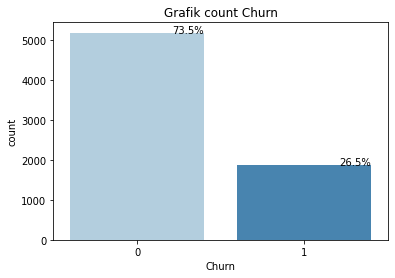

In [17]:
ax = sns.countplot(x='Churn', data=df_clean, palette="Blues")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_clean))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.title('Grafik count Churn')
plt.show()

> Berdasarkan tabel atau grafik diatas, diperoleh informasi bahwa pada kolom data target label 0 memiliki data sebanyak 73.5% sedangkan label 1 memiliki data sebanyak 26%

> Berdasarkan informasi diatas, dapat disimpulkan bahwa pada kolom target memiliki data yang imbalance, sehingga perlu adanya handling imbalance.

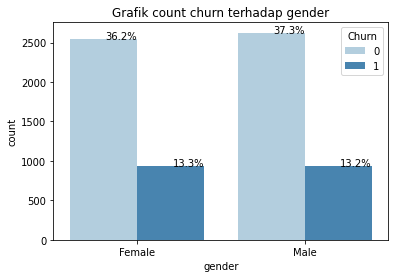

In [18]:
ax = sns.countplot(x='gender', data=df_clean, hue='Churn', palette="Blues")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/len(df_clean))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.title('Grafik count churn terhadap gender')
plt.show()

> Grafik diatas merupakan barplot kolom gender terhadap kolom Churn, yang mana customer dengan jenis kelamin Male atau pria didominasi dengan customer yang tidak churn 

> Sedangkan customer dengan jenis kelamin female atau perempuan sama seperti customer male didominasi oleh customer yang tidak churn

Text(0.5, 1.0, 'percentage of Senior Citizens')

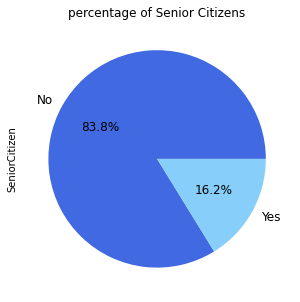

In [19]:
ax = (df_clean['SeniorCitizen'].value_counts()*100.0 /len(df_clean)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5),colors=['royalblue','lightskyblue'], fontsize = 12 )                                                                           
ax.set_title('percentage of Senior Citizens', fontsize = 12)

> Berdasarkan pie chart diatas diperoleh informasi bahwa pada kolom seniorcitizen didominasi oleh No seniorchitizen, yang berrati pada dataset didominasi oleh customer yang berumur dibawah 65 tahun, karna arti dari seniorcitizen itu adalah  customer yang diatas 65 tahun

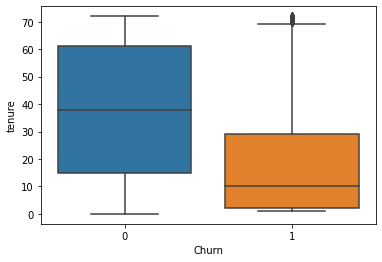

In [20]:
sns.boxplot(data=df_clean, x='Churn', y='tenure')

> Berdasarkan grafik boxplot diatas yang merupakan boxplot antara kolom tenure dan kolom churn, dapat diartikan bahwa customer tidak churn atau pada label 0 memiliki pemusaatan data disekitar 15-60 bulan dalam kolom tenure


> Sedangkan customer churn atau pada label 1 memiliki pemusaatan data disekitar 3-30 bulan dalam kolom tenure

## **6. Data Preprocessing**

In [21]:
df_clean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1


In [22]:
# df inference
df_notna = df_clean[~df_clean.isna().any(axis=1)] 
df_inf = df_notna.sample(5, random_state=0) 
df_clean.drop(df_inf.index, inplace=True)
df_clean.reset_index(drop=True, inplace=True)

In [23]:
df_inf.reset_index(drop=True, inplace=True)
df_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.650,20.650,0
1,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.600,330.250,0
2,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.800,19.800,0
3,Male,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.250,24.250,1
4,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.400,74.400,1


> Untuk data inference digunakan 5 data yang diambil secara random pada dataset untuk digunakan pada tahap model inference yang bertujuan untuk menguji model yang sudah dibuat berfungi atau tidak ketikan dimasukan data baru selain data train dan data test

In [24]:
df_clean.reset_index(drop=True, inplace=True) 
df_clean

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7033,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800,1990.500,0
7034,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200,7362.900,0
7035,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.600,346.450,0
7036,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.400,306.600,1


In [25]:
# split awal buat EDA Modeling
X = df_clean.drop('Churn', axis=1)
y = df_clean['Churn']

X_train_awal, X_test_awal, y_train_awal, y_test_awal = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [26]:
for i in [X_train_awal, X_test_awal, y_train_awal, y_test_awal]:
    print(i.shape)

(5630, 19)
(1408, 19)
(5630,)
(1408,)


In [27]:
df_eda = pd.concat([X_train_awal, y_train_awal], axis=1)
df_eda.shape

(5630, 20)

 > Spliting data menjadi data feature dan data target yang mana dataset sebelumnya sudah di ambil sebagian untuk data inference. Data feature dan data target, selanjutnya dibagi menjadi dua, yaitu sebagai data train dan data test yang mana pembagian data sebanyak 80% data train dan 20% data test

 > Spliting ini merupakan spliting awal dan nantinya akan dilakukan spliting ulang utuk dimasukkan ke dalam pipeline. Spliting awal ini hanya digunakan pada EDA - Modeling saja, yang mana EDA - Modeling bertujuan untuk melihat perilaku apa saja pada data train yang nantinya digunakan di pipeline.

### **6.1 Exploratory Data Analysis (EDA) - Modeling**

In [28]:
df_eda.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3582,Male,0,Yes,Yes,40,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Mailed check,60.300,2448.500,0
1751,Male,0,No,No,14,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,89.950,1178.400,1
6888,Female,0,Yes,Yes,6,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Credit card (automatic),55.900,365.350,1
275,Male,0,Yes,No,5,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check,85.400,401.100,1
599,Male,0,Yes,No,65,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),20.400,1414.450,0


In [29]:
num_col = ['tenure','MonthlyCharges', 'TotalCharges']
cat_col = [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 
           'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 
           'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling','PaymentMethod', 'Churn']

> Code diatas merupakan pendefinisian kolom mana saja yang termasuk kedalam kolom numerik dan kolom kategorik, hal ini bertujuan untuk mempermudah peroses selanjutnya

#### **Numerical Feature**

In [30]:
df_eda[num_col].head()

,tenure,MonthlyCharges,TotalCharges
3582,40,60.300,2448.500
1751,14,89.950,1178.400
6888,6,55.900,365.350
275,5,85.400,401.100
599,65,20.400,1414.450


In [31]:
# numeric overview
df_eda[num_col].describe()

,tenure,MonthlyCharges,TotalCharges
count,5630.000,5630.000,5622.000
mean,32.413,64.877,2291.907
std,24.591,30.077,2276.374
min,0.000,18.250,18.850
25%,9.000,35.900,401.587
50%,29.000,70.350,1396.575
75%,55.000,89.938,3814.250
max,72.000,118.750,8684.800


##### **Handling Outlier**

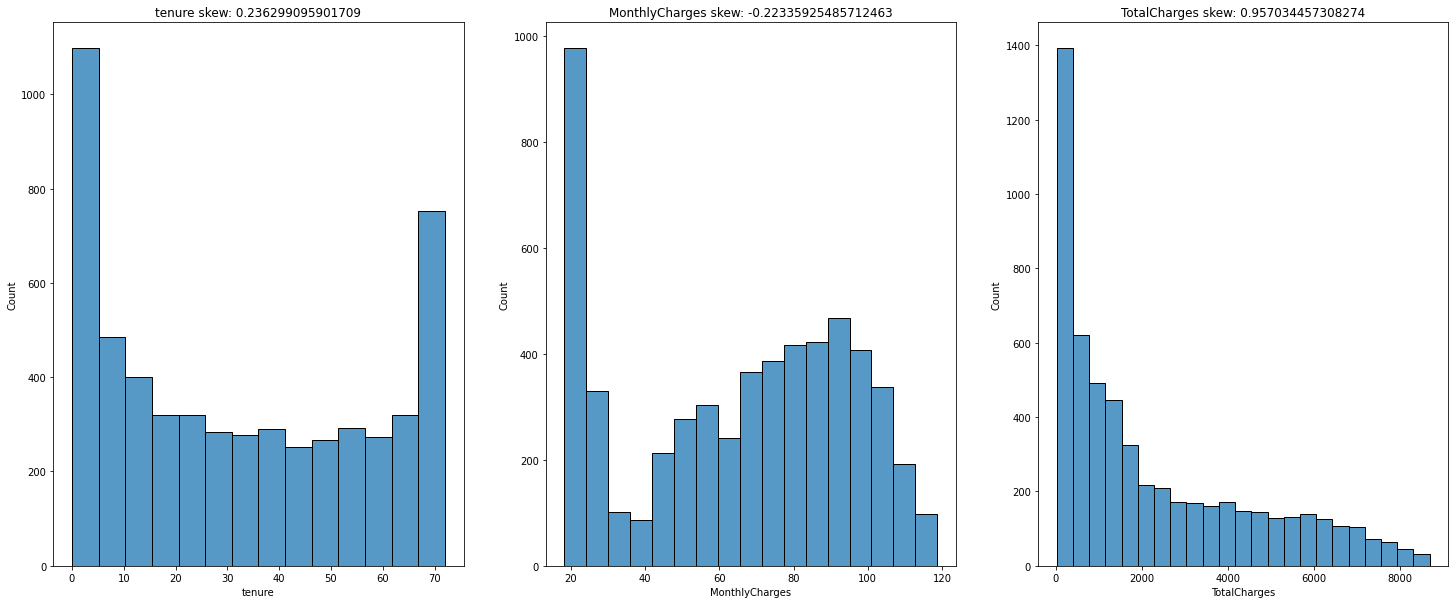

In [32]:
fig, ax = plt.subplots(ncols=3, figsize=[25,10])
ax = ax.flatten()

for idx, col in enumerate(num_col):
    sns.histplot(df_eda[col], ax=ax[idx])
    ax[idx].set_title(f'{num_col[idx]} skew: {df_eda[col].skew()}')

> Berdasarkan grafik histogram diatas merupakan grafik pada kolom data numerik, secara visual dari hasil histogram tidak terdapat adanya outlier disetiap kolom numerik, akan tetapi tidak bisa dipastikan apakah emang benar disetiap kolom tidak terdapat outlier, sehingga perlu dilakukan analisis lebih lanjut untuk mendeteksi outlier, tahapan dibawah ini akan melihat apakan terdapat outlier atau tidak pada kolom numerik

In [33]:
# outlier detection
# gaussian
upper = df_eda['tenure'].mean() + (3*df_eda['tenure'].std())
lower = df_eda['tenure'].mean() - (3*df_eda['tenure'].std())

outlier = df_eda[(df_eda['tenure'] <= lower) | (df_eda['tenure'] >= upper)]

print('percentage: ', len(outlier)/df_eda.shape[0] * 100, '%')

percentage:  0.0 %


> Berdasarkan code diatas yang merupakan code untuk mendeteksi apakah terdapat outlier atau tidak. Untuk kolom tenure menggunakan Z score untuk mendeteksi outlier, dikarnakan kolom tenure mimiliki distribusi normal dengan nilai skew 0.2. Dan berdasarkan hasil deteksi outlier, pada kolom tenur tidak terdapat outlier

In [34]:
# outlier detection
# gaussian
upper = df_eda['MonthlyCharges'].mean() + (3*df_eda['MonthlyCharges'].std())
lower = df_eda['MonthlyCharges'].mean() - (3*df_eda['MonthlyCharges'].std())

outlier = df_eda[(df_eda['MonthlyCharges'] <= lower) | (df_eda['MonthlyCharges'] >= upper)]

print('percentage: ', len(outlier)/df_eda.shape[0] * 100, '%')

percentage:  0.0 %


> Sama halnya dengan kolom tenure, kolom monthlycharges juga menggunakan Z score untuk mendeteksi outlier dikarnakan kolom monthlycharges memiliki distribusi normal dengan nilai skew -0.2, Dan berdasarkan hasil deteksi outlier, pada kolom monthlycharges tidak terdapat outlier

In [35]:
Q1 = df_eda['TotalCharges'].quantile(.25)
Q3 = df_eda['TotalCharges'].quantile(.75)

IQR = Q3 - Q1

upper = Q3 + (1.5*IQR)
lower = Q1 - (1.5*IQR)

outlier = df_eda[(df_eda['TotalCharges'] <= lower) | (df_eda['TotalCharges'] >= upper)]

print('percentage: ', len(outlier)/df_eda.shape[0] * 100, '%')

percentage:  0.0 %


> Pada kolom totalcharges untuk mendeteksi outlier menggunakan tukey dikarnakan kolom totalcharges memiliki distribusi yang tidak normal atau skew dengan nilai skew 0.9 dan berdasarkan hasil deteksi outlier, pada kolom totalcharges tidak terdapat outlier

##### **Handling Missing Value**

In [36]:
df_eda[num_col].isnull().sum()

tenure            0
MonthlyCharges    0
TotalCharges      8
dtype: int64

> Terdapat missing values pada kolom totalchange sebnayak 8 data, dan akan dilakukan simple imputer dengan menggunakan nilai median pada kolom totalchange, karena pada kolom totalchange memiliki ditribusi skew sehingga simple imputernya menggunakan median

In [37]:
imp_num = SimpleImputer(strategy='median')

df_eda[num_col] = imp_num.fit_transform(df_eda[num_col])
df_eda[num_col].isnull().sum()

tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

> Dan setelah dilakukan simple imputer, sudah tidak terdapat missing values pada kolom numerik

##### **scaling features numeric**

In [38]:
scaler = StandardScaler()

df_eda[num_col] = scaler.fit_transform(df_eda[num_col])
df_eda[num_col]

,tenure,MonthlyCharges,TotalCharges
3582,0.309,-0.152,0.069
1751,-0.749,0.834,-0.489
6888,-1.074,-0.299,-0.846
275,-1.115,0.682,-0.831
599,1.325,-1.479,-0.385
...,...,...,...
4543,-1.278,-0.689,-0.988
5942,0.390,0.300,0.382
579,-1.237,-1.504,-0.990
5134,-1.237,0.257,-0.939


> Dilakukan scaling pada kolom numerik dengan menggunakan StandarScaler, dikarnakan rata - rata kolom numerik yang dilakukan scaling memiliki distribusi normal. Feature scaling ini bertujuan untuk menormalisasikan data numerik

#### **Categorical Feature**

In [39]:
df_eda[cat_col].isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
dtype: int64

In [40]:
df_eda[cat_col].head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
3582,Male,0,Yes,Yes,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,No,Mailed check,0
1751,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,1
6888,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Credit card (automatic),1
275,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
599,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),0


In [41]:
for i in cat_col:
    print(df_eda[i].value_counts())
    print('-'*30)

Female    2820
Male      2810
Name: gender, dtype: int64
------------------------------
0    4700
1     930
Name: SeniorCitizen, dtype: int64
------------------------------
No     2893
Yes    2737
Name: Partner, dtype: int64
------------------------------
No     3948
Yes    1682
Name: Dependents, dtype: int64
------------------------------
Yes    5095
No      535
Name: PhoneService, dtype: int64
------------------------------
No                  2705
Yes                 2390
No phone service     535
Name: MultipleLines, dtype: int64
------------------------------
Fiber optic    2477
DSL            1942
No             1211
Name: InternetService, dtype: int64
------------------------------
No                     2795
Yes                    1624
No internet service    1211
Name: OnlineSecurity, dtype: int64
------------------------------
No                     2487
Yes                    1932
No internet service    1211
Name: OnlineBackup, dtype: int64
------------------------------
No   

##### **One Hot Encoding**

> Untuk kolom data kategorik `MultipleLines` , `InternetService`,`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract` dan `PaymentMethod` akan dilakukan encoding dengan metode One Hot Encoding dikarnakan label disetiap kolom tidak bisa diurutkan atau tidak memiliki ranking. Berikut proses encodingnya:

In [42]:
ohe_enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

cat_ohe = pd.DataFrame(ohe_enc.fit_transform(df_eda[['MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']]))
cat_ohe.columns = ohe_enc.get_feature_names(['MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'])

review = pd.concat([df_eda[['MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']].reset_index(drop=True), cat_ohe], axis=1)
review

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,One year,Mailed check,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
1,Yes,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Electronic check,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Credit card (automatic),1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
3,Yes,Fiber optic,No,Yes,No,Yes,No,No,Month-to-month,Electronic check,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
4,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Credit card (automatic),1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,No,DSL,No,No,No,No,No,No,Month-to-month,Bank transfer (automatic),1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000
5626,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,Credit card (automatic),1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
5627,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Mailed check,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000
5628,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Mailed check,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000


In [43]:
cat_ohe

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
1,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
2,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
3,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
4,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000
5626,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
5627,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000
5628,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000


> Dikarnakan hasil kolom dummy terlalu banyak, maka pada hasil encoding ohe dibagi menjadi dua bagian tabel, yang berguna untuk mempermudah melakukan heatmap correlation

In [44]:
cat_ohe_1 = cat_ohe.iloc[:,:15]
cat_ohe_1

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
1,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
2,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000
3,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000
4,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
5626,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000
5627,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
5628,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000


In [45]:
cat_ohe_2 = cat_ohe.iloc[:,15:31]
cat_ohe_2

,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
1,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
2,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000
3,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
4,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000
5626,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
5627,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000
5628,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000


##### **Ordinal Encoder**

> Untuk kolom data kategorik `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling` dan `Churn` akan dilakukan encoding dengan metode Ordinal Encoding dikarnakan label disetiap kolom dapat diurutkan. Berikut proses encodingnya:

In [46]:
genre_cat = ['Male', 'Female']
sc_cat = [0,1]
par_cat = ['No', 'Yes']
dep_cat = ['No', 'Yes']
phone_cat = ['No', 'Yes']
paper_cat = ['No', 'Yes']
churn_cat = [0, 1]

ord_enc = OrdinalEncoder(categories=[genre_cat, sc_cat, par_cat, dep_cat, phone_cat, paper_cat, churn_cat])
cat_ord = pd.DataFrame(ord_enc.fit_transform(df_eda[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']]))

cat_ord.columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
review = pd.concat([df_eda[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']].reset_index(drop=True), cat_ord], axis=1)

review

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,Male,0,Yes,Yes,No,No,0,0.000,0.000,1.000,1.000,0.000,0.000,0.000
1,Male,0,No,No,Yes,Yes,1,0.000,0.000,0.000,0.000,1.000,1.000,1.000
2,Female,0,Yes,Yes,Yes,No,1,1.000,0.000,1.000,1.000,1.000,0.000,1.000
3,Male,0,Yes,No,Yes,Yes,1,0.000,0.000,1.000,0.000,1.000,1.000,1.000
4,Male,0,Yes,No,Yes,Yes,0,0.000,0.000,1.000,0.000,1.000,1.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,Female,0,No,No,Yes,No,0,1.000,0.000,0.000,0.000,1.000,0.000,0.000
5626,Female,0,No,No,Yes,No,1,1.000,0.000,0.000,0.000,1.000,0.000,1.000
5627,Male,0,No,No,Yes,Yes,0,0.000,0.000,0.000,0.000,1.000,1.000,0.000
5628,Male,1,No,No,Yes,Yes,0,0.000,1.000,0.000,0.000,1.000,1.000,0.000


In [47]:
cat_ord

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0.000,0.000,1.000,1.000,0.000,0.000,0.000
1,0.000,0.000,0.000,0.000,1.000,1.000,1.000
2,1.000,0.000,1.000,1.000,1.000,0.000,1.000
3,0.000,0.000,1.000,0.000,1.000,1.000,1.000
4,0.000,0.000,1.000,0.000,1.000,1.000,0.000
...,...,...,...,...,...,...,...
5625,1.000,0.000,0.000,0.000,1.000,0.000,0.000
5626,1.000,0.000,0.000,0.000,1.000,0.000,1.000
5627,0.000,0.000,0.000,0.000,1.000,1.000,0.000
5628,0.000,1.000,0.000,0.000,1.000,1.000,0.000


#### **Feature Selection**

> Dilakukan feature selection guna mendapatkan fetuare apa saja yang nantinya digunakan dalam modeling

**Feature Selection untuk data feature numerik dengan menggunakan Correlation**

In [48]:
df_num = pd.concat([df_eda[num_col].reset_index(drop=True),cat_ord['Churn']],axis=1)
df_num

,tenure,MonthlyCharges,TotalCharges,Churn
0,0.309,-0.152,0.069,0.000
1,-0.749,0.834,-0.489,1.000
2,-1.074,-0.299,-0.846,1.000
3,-1.115,0.682,-0.831,1.000
4,1.325,-1.479,-0.385,0.000
...,...,...,...,...
5625,-1.278,-0.689,-0.988,0.000
5626,0.390,0.300,0.382,1.000
5627,-1.237,-1.504,-0.990,0.000
5628,-1.237,0.257,-0.939,0.000


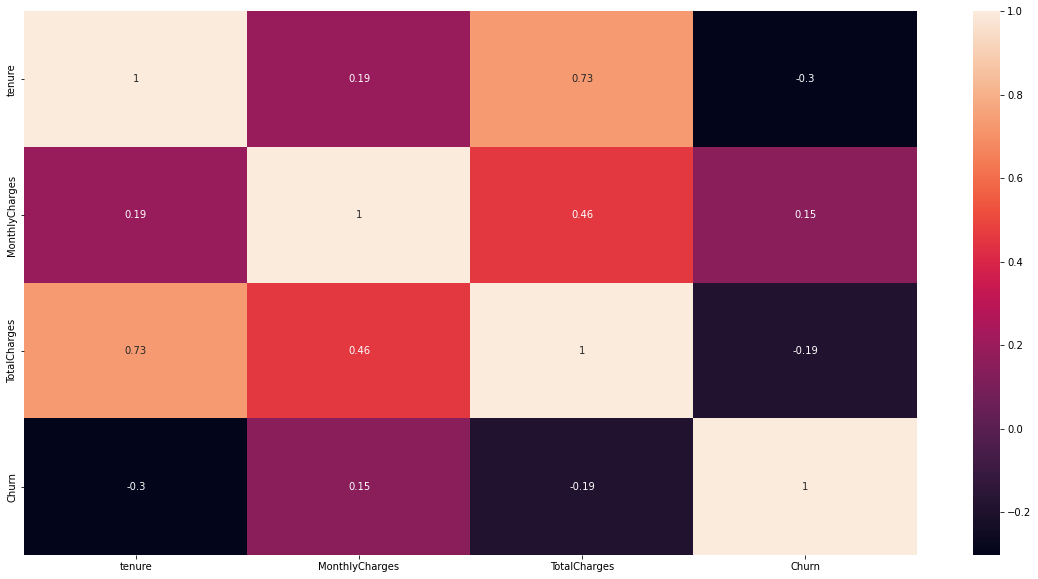

In [49]:
fig,ax = plt.subplots(figsize=[20,10])

corr = df_num.corr(method='kendall')

ax = sns.heatmap(corr,annot=True)
plt.show()

> Dari hasil correlation diatas yang merupakan correlation pada kolom numerik terhadap target menggunakan corr dengan method kendall di karnakan input yang digunakan numerik dan outputnya kategorik , saya menetapkan untuk mengambil kolom yang memiliki nilai correlation lebih dari sama dengan 0.1, sehingga berdasarkan hasil correlation diatas diperoleh kolom feature pada kolom numerik sebagai berikut: `tenure`,`MonthlyCharges` dan `TotalCharges`

**Feature Selection untuk data feature kategorik dengan menggunakan Correlation**

In [50]:
df_cat_ohe_1 = pd.concat([cat_ohe_1.reset_index(drop=True),cat_ord['Churn']],axis=1)
df_cat_ohe_1

,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,Churn
0,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000
1,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000
2,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000
3,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000
4,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000
5626,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000
5627,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
5628,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000


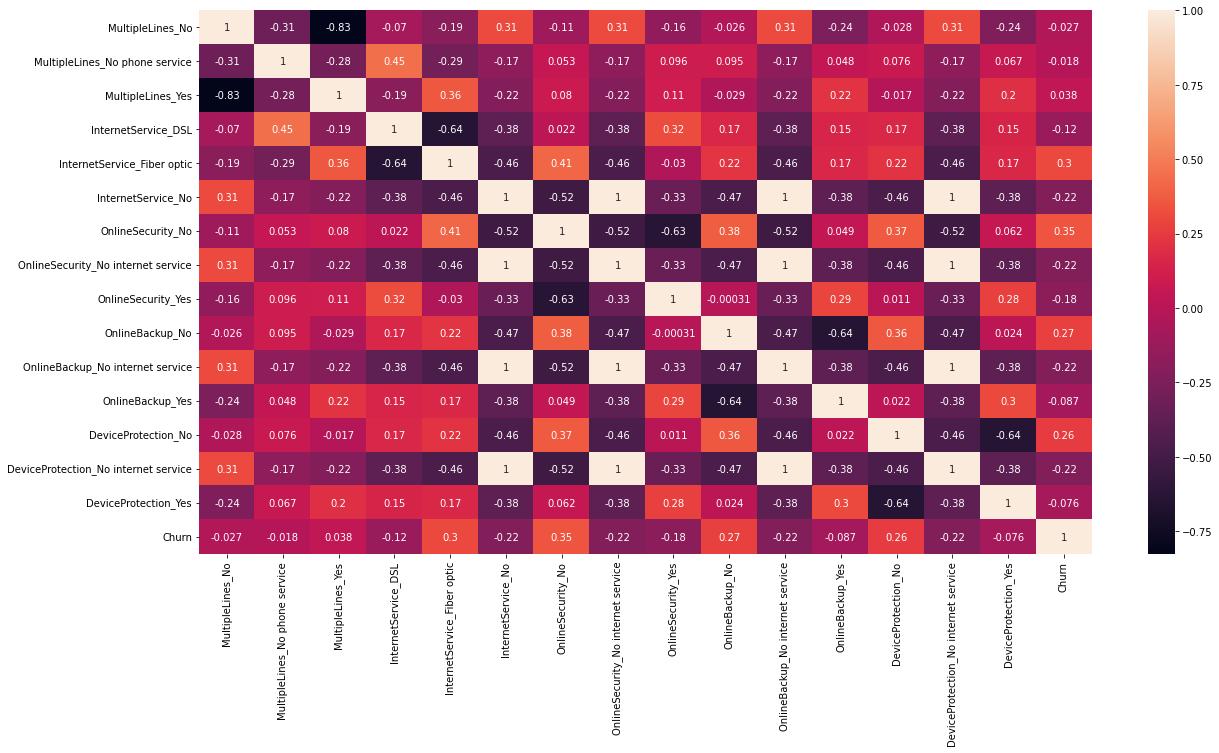

In [51]:
fig,ax = plt.subplots(figsize=[20,10])

corr = df_cat_ohe_1.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

In [52]:
df_cat_ohe_2 = pd.concat([cat_ohe_2.reset_index(drop=True),cat_ord['Churn']],axis=1)
df_cat_ohe_2

,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000
1,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000
2,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000
3,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000
4,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
5626,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000
5627,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
5628,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000


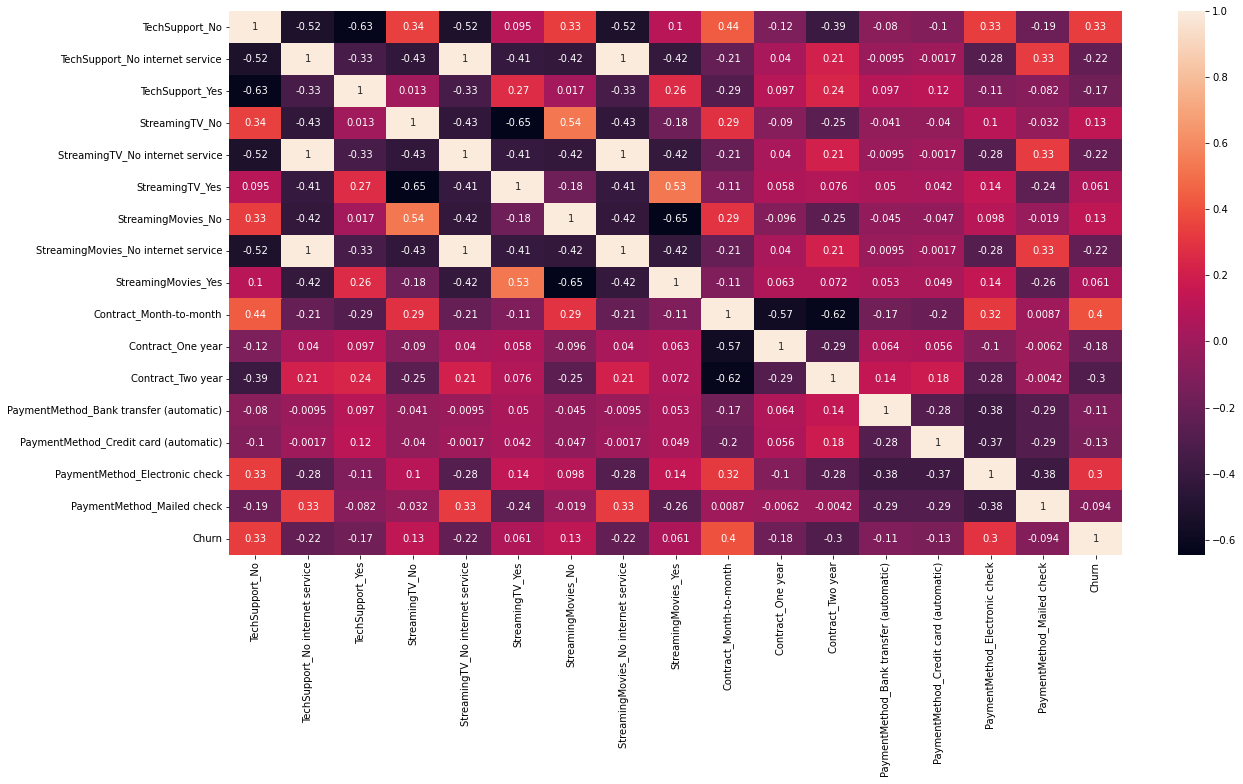

In [53]:
fig,ax = plt.subplots(figsize=[20,10])

corr = df_cat_ohe_2.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

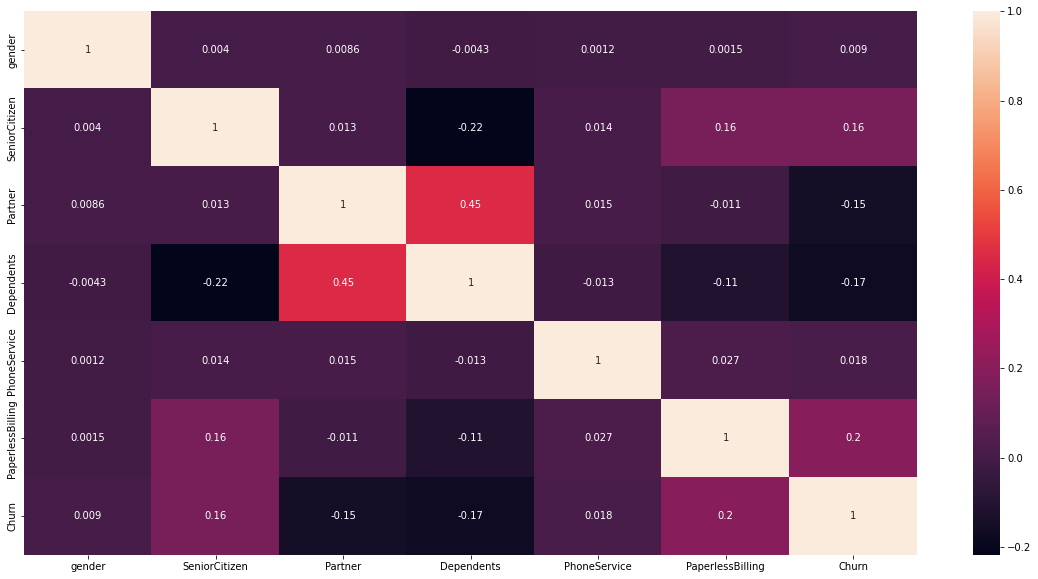

In [54]:
fig,ax = plt.subplots(figsize=[20,10])

corr = cat_ord.corr()

ax = sns.heatmap(corr,annot=True)
plt.show()

In [55]:
df_eda_cleaned = pd.concat([df_eda[num_col].reset_index(drop=True),cat_ohe_1,cat_ohe_2,cat_ord],axis=1)
df_eda_cleaned.head()

,tenure,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn
0,0.309,-0.152,0.069,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000
1,-0.749,0.834,-0.489,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
2,-1.074,-0.299,-0.846,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000,1.000
3,-1.115,0.682,-0.831,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000
4,1.325,-1.479,-0.385,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000


> Proses diatas merupakan feature selection pada data kolom kategorik dengan menggunakan heatmap correlation. Dikarnakan input merupakan kategorik dan outpunya merupakan kategorik, penggunaan heatmap correlation tidak tepat, sehingga perlu menggunakan metode lain

In [56]:
chi_list = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [57]:
for col in chi_list:
    contingency_table = pd.crosstab(df_eda[col], df_eda["Churn"])
    stat, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(col)
    print('p=%.3f' % (p))
    if p > 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')
    print('\n')

gender
p=0.519
Probably independent


SeniorCitizen
p=0.000
Probably dependent


Partner
p=0.000
Probably dependent


Dependents
p=0.000
Probably dependent


PhoneService
p=0.203
Probably independent


MultipleLines
p=0.016
Probably dependent


InternetService
p=0.000
Probably dependent


OnlineSecurity
p=0.000
Probably dependent


OnlineBackup
p=0.000
Probably dependent


DeviceProtection
p=0.000
Probably dependent


TechSupport
p=0.000
Probably dependent


StreamingTV
p=0.000
Probably dependent


StreamingMovies
p=0.000
Probably dependent


Contract
p=0.000
Probably dependent


PaperlessBilling
p=0.000
Probably dependent


PaymentMethod
p=0.000
Probably dependent




> Feature selection pada kolom kategorik menggunakan chi - square dikarnakan metode chi - square cocok digunakan jika input berupa data kategorik dan output berupa data kategorik

> Bedasarkan hasil chi - square diatas, diketahui bahwa hanya kolom gender dan kolom PhoneService yang tidak memuliki hubungan pada kolom churn, sehingga kolom gender dan kolom PhoneService tidak terpilih pada feature selection

> Dan berdasarkan proses feature selection diatas baik pada kolom numerik dan kolom kategorik, semua kolom feature pada dataset dipilih kecuali kolom gender dan kolom PhoneService 

Berdasarkan proses pada tahap Exploratory Data Analysis (EDA) - Modeling pada data traning dapat direkap sebagai berikut:

- Numerical Feature:
1. Handling missing value dengan imputasi nilai median
3. Feature Selection dan diperoleh semua kolom feature pada dataset terpilih kecuali kolom `gender` dan kolom `PhoneService`
4. Feature Scaling pada kolom numerik dengan menggunkana Standar Scaler

- Categorical Feature:
1. One Hot Encoding terhadap kolom `MultipleLines` , `InternetService`,`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract` dan `PaymentMethod` 
1. Ordinal Encodeng terhadap kolom `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling` dan `Churn` 

### **6.2 Data Preprocessing**

> Pada project ini akan dibuat dua pipeline pada data preprocessing, pipeline pertama merupakan pipeline sklearn dan pipeline kedua merupakan pipeline tensorflow yang nantinya akan digunakan untuk tahapan modeling. Proses Exploratory Data Analysis (EDA) - Modeling pada data traning diatas bertujuan untuk gambaran perilaku apa saja yang digunakan terhadap data train, sehingga pada pipeline bisa ditentukan perilaku apa saja yang digunakan

#### **Pipeline Sklearn**

In [58]:
X_train_full, X_test,  y_train_full, y_test = train_test_split(X,
                                                               y,
                                                               shuffle=True, test_size=0.2,
                                                               stratify= y
                                                               )

X_train, X_val, y_train, y_val = train_test_split(X_train_full,
                                                  y_train_full,
                                                  shuffle=True, test_size=0.2)

In [59]:
X_train.shape

(4504, 19)

In [60]:
X_val.shape

(1126, 19)

In [61]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

In [62]:
cat_1_pipeline = Pipeline([
        ('ohe_enc', OneHotEncoder(sparse=False))
    ])

In [63]:
cat_2_pipeline = Pipeline([
        ('ordinal_enc', OrdinalEncoder(categories=[[0,1],['No', 'Yes'],['No', 'Yes'],['No', 'Yes']])) 
    ])

In [64]:
unbalance_pipeline = ColumnTransformer([
        ("num", num_pipeline, ['tenure', 'MonthlyCharges', 'TotalCharges']),
        ("cat_ohe", cat_1_pipeline, ['InternetService', 'MultipleLines', 'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']),
        ("cat_ord", cat_2_pipeline, ['SeniorCitizen', 'Partner', 'Dependents','PaperlessBilling'])
    ])

In [65]:
unbalance_pipeline.fit_transform(X_train)
X_test = unbalance_pipeline.transform(X_test)
X_val = unbalance_pipeline.transform(X_val)

> Proses diatas merupakan pembuatan pipeline sklearn dan di fit ke data X_train kemudian di transform ke data X_test dan data X_val

In [66]:
a = pd.DataFrame(unbalance_pipeline.fit_transform(X_train))
a.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,0.028,0.950,0.366,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,1.000
1,-0.216,0.550,-0.033,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000


In [67]:
balance_pipeline = imbpipe([
            ('preprocess', unbalance_pipeline),
            ('over_sampl', SMOTENC(categorical_features=[3,4,5,6,7,8,9,10,11,12,13,14,15,16,
                                                         17,18,19,20,21,22,23,24,25,26,27,28,
                                                         29,30,31,32,33,34,35,36,37],sampling_strategy='minority', random_state=0))
])

In [68]:
X_train_resampled, y_train_resampled = balance_pipeline.fit_resample(X_train, y_train)

> Proses diatas merupakan pembuatan pipeline sklearn dengan penambahan proses handling imbalance terhadap data training, sehingga pada data traning memiliki data yang balance

In [69]:
X_train_resampled.shape

(6586, 38)

In [70]:
X_test.shape

(1408, 38)

In [71]:
X_val.shape

(1126, 38)

#### **Pipeline TensorFlow**

In [72]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_resampled, y_train_resampled))
train_dataset = train_dataset.shuffle(buffer_size=6000).batch(32)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(32)

> Cell diatas merupakan proese pembuatan pipeline tensorflow yang nantinya digunakan untuk proses pemodelan

## **7. Modeling** 

### **7.1. Model Definition**

In [73]:
#Sequential
model_seq_1 = Sequential()
model_seq_1 = tf.keras.models.Sequential()
model_seq_1.add(tf.keras.layers.Dense(units=20, activation='relu', input_shape = (38,)))
model_seq_1.add(tf.keras.layers.Dense(units=10, activation='relu'))
model_seq_1.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model_seq_1.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [74]:
model_seq_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                780       
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [75]:
#Sequential Model Improvement
model_seq_2 = tf.keras.models.Sequential()
model_seq_2.add(tf.keras.layers.Dense(20, activation='relu', input_shape=(38,),kernel_initializer='HeNormal',kernel_regularizer='l2'))
model_seq_2.add(tf.keras.layers.BatchNormalization())
model_seq_2.add(tf.keras.layers.Dense(10, activation='relu'))
model_seq_2.add(tf.keras.layers.BatchNormalization())
model_seq_2.add(tf.keras.layers.Dropout(0.1))
model_seq_2.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model_seq_2.compile(optimizer=tf.keras.optimizers.Adamax(clipvalue=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [76]:
model_seq_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                780       
                                                                 
 batch_normalization (BatchN  (None, 20)               80        
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 batch_normalization_1 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

In [77]:
#Functional
input_layer = tf.keras.Input(shape = (38, ), name = "input_layer" ) 
hidden_1 = tf.keras.layers.Dense(20, activation ='relu', name = "hidden_1" )(input_layer)
hidden_2 = tf.keras.layers.Dense(10, activation ='relu', name = "hidden_2" )(hidden_1)
output_layer = tf.keras.layers.Dense(1,activation = 'sigmoid',  name = "output_layer")(hidden_2)

model_func_1 = tf.keras.Model(inputs = input_layer, outputs = output_layer)
model_func_1.compile(optimizer = 'Adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
model_func_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 38)]              0         
                                                                 
 hidden_1 (Dense)            (None, 20)                780       
                                                                 
 hidden_2 (Dense)            (None, 10)                210       
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 1,001
Trainable params: 1,001
Non-trainable params: 0
_________________________________________________________________


In [79]:
#Functional Model Improvement
input_lyr = tf.keras.layers.Input(shape=(38,))
layers = tf.keras.layers.Dense(20, activation='relu',kernel_initializer='HeNormal',kernel_regularizer='l2')(input_lyr)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dense(10, kernel_initializer='HeNormal',activation='relu')(layers)
layers = tf.keras.layers.BatchNormalization()(layers)
layers = tf.keras.layers.Dropout(0.1)(layers)
output = tf.keras.layers.Dense(1, kernel_initializer='HeNormal',activation='sigmoid')(layers)

model_func_2 = tf.keras.models.Model(inputs=input_lyr,outputs=output)
model_func_2.compile(optimizer=tf.keras.optimizers.Adamax(clipvalue=0.01), loss='binary_crossentropy', metrics=['accuracy'])

In [80]:
model_func_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 38)]              0         
                                                                 
 dense_6 (Dense)             (None, 20)                780       
                                                                 
 batch_normalization_2 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 batch_normalization_3 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 10)                0   

> Pada tahap model definition, model yang digunakan sebagai berikut:

1. ANN Sequential
2. ANN Sequential Model Improvement
3. ANN Functional
4. ANN Functional Model Improvement

> Dari model - model ini akan dilihat performa berdasarkan acurracy disetiap model sehingga diperoleh satu model yang nantinya akan digunakan pada tahap selanjutnya

### **7.2. Model Training**

In [81]:
#Sequential
history_seq_1=model_seq_1.fit(train_dataset, epochs=50, batch_size = 32, validation_data=val_dataset)

Epoch 1/50
206/206 [==============================] - 1s 3ms/step - loss: 0.6121 - accuracy: 0.7006 - val_loss: 0.5710 - val_accuracy: 0.7016
Epoch 2/50
206/206 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.7684 - val_loss: 0.5250 - val_accuracy: 0.7318
Epoch 3/50
206/206 [==============================] - 0s 2ms/step - loss: 0.4733 - accuracy: 0.7807 - val_loss: 0.4903 - val_accuracy: 0.7593
Epoch 4/50
206/206 [==============================] - 0s 2ms/step - loss: 0.4608 - accuracy: 0.7839 - val_loss: 0.4892 - val_accuracy: 0.7584
Epoch 5/50
206/206 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.7877 - val_loss: 0.4719 - val_accuracy: 0.7655
Epoch 6/50
206/206 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.7903 - val_loss: 0.4691 - val_accuracy: 0.7629
Epoch 7/50
206/206 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.7911 - val_loss: 0.4904 - val_accuracy: 0.7540
Epoch 

In [82]:
#Sequential Model Improvement
history_seq_2=model_seq_2.fit(train_dataset, epochs=50, batch_size = 32, validation_data=val_dataset)

Epoch 1/50
206/206 [==============================] - 2s 3ms/step - loss: 0.8677 - accuracy: 0.7379 - val_loss: 0.7919 - val_accuracy: 0.7265
Epoch 2/50
206/206 [==============================] - 0s 2ms/step - loss: 0.7061 - accuracy: 0.7716 - val_loss: 0.6700 - val_accuracy: 0.7593
Epoch 3/50
206/206 [==============================] - 0s 2ms/step - loss: 0.6238 - accuracy: 0.7809 - val_loss: 0.5893 - val_accuracy: 0.7647
Epoch 4/50
206/206 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.7859 - val_loss: 0.5666 - val_accuracy: 0.7620
Epoch 5/50
206/206 [==============================] - 1s 2ms/step - loss: 0.5457 - accuracy: 0.7868 - val_loss: 0.5378 - val_accuracy: 0.7691
Epoch 6/50
206/206 [==============================] - 0s 2ms/step - loss: 0.5171 - accuracy: 0.7984 - val_loss: 0.5244 - val_accuracy: 0.7655
Epoch 7/50
206/206 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7892 - val_loss: 0.5168 - val_accuracy: 0.7700
Epoch 

In [83]:
#Functional
history_func_1=model_func_1.fit(train_dataset, epochs=50, batch_size = 32, validation_data=val_dataset)

Epoch 1/50
206/206 [==============================] - 1s 3ms/step - loss: 0.5637 - accuracy: 0.7243 - val_loss: 0.5076 - val_accuracy: 0.7575
Epoch 2/50
206/206 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.7756 - val_loss: 0.4859 - val_accuracy: 0.7638
Epoch 3/50
206/206 [==============================] - 0s 2ms/step - loss: 0.4654 - accuracy: 0.7829 - val_loss: 0.4812 - val_accuracy: 0.7629
Epoch 4/50
206/206 [==============================] - 0s 2ms/step - loss: 0.4578 - accuracy: 0.7859 - val_loss: 0.4693 - val_accuracy: 0.7709
Epoch 5/50
206/206 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.7889 - val_loss: 0.4713 - val_accuracy: 0.7664
Epoch 6/50
206/206 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.7937 - val_loss: 0.4703 - val_accuracy: 0.7682
Epoch 7/50
206/206 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.7941 - val_loss: 0.4671 - val_accuracy: 0.7700
Epoch 

In [84]:
#Functional Model Improvement
history_func_2=model_func_2.fit(train_dataset, epochs=50, batch_size = 32, validation_data=val_dataset)

Epoch 1/50
206/206 [==============================] - 2s 3ms/step - loss: 0.9140 - accuracy: 0.7148 - val_loss: 0.7780 - val_accuracy: 0.7735
Epoch 2/50
206/206 [==============================] - 0s 2ms/step - loss: 0.7055 - accuracy: 0.7689 - val_loss: 0.6406 - val_accuracy: 0.7895
Epoch 3/50
206/206 [==============================] - 0s 2ms/step - loss: 0.6099 - accuracy: 0.7829 - val_loss: 0.5717 - val_accuracy: 0.7806
Epoch 4/50
206/206 [==============================] - 0s 2ms/step - loss: 0.5602 - accuracy: 0.7827 - val_loss: 0.5239 - val_accuracy: 0.7842
Epoch 5/50
206/206 [==============================] - 0s 2ms/step - loss: 0.5226 - accuracy: 0.7886 - val_loss: 0.5114 - val_accuracy: 0.7851
Epoch 6/50
206/206 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.7941 - val_loss: 0.5073 - val_accuracy: 0.7664
Epoch 7/50
206/206 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.7930 - val_loss: 0.5083 - val_accuracy: 0.7735
Epoch 

In [85]:
keras.backend.clear_session()

> Proses diatas merupakn tahapan traning pada setiap model yang ditentukan, dangan masing - masing model menggunakan epoch sebanyak 50 kali

### **7.3. Model Evaluation**

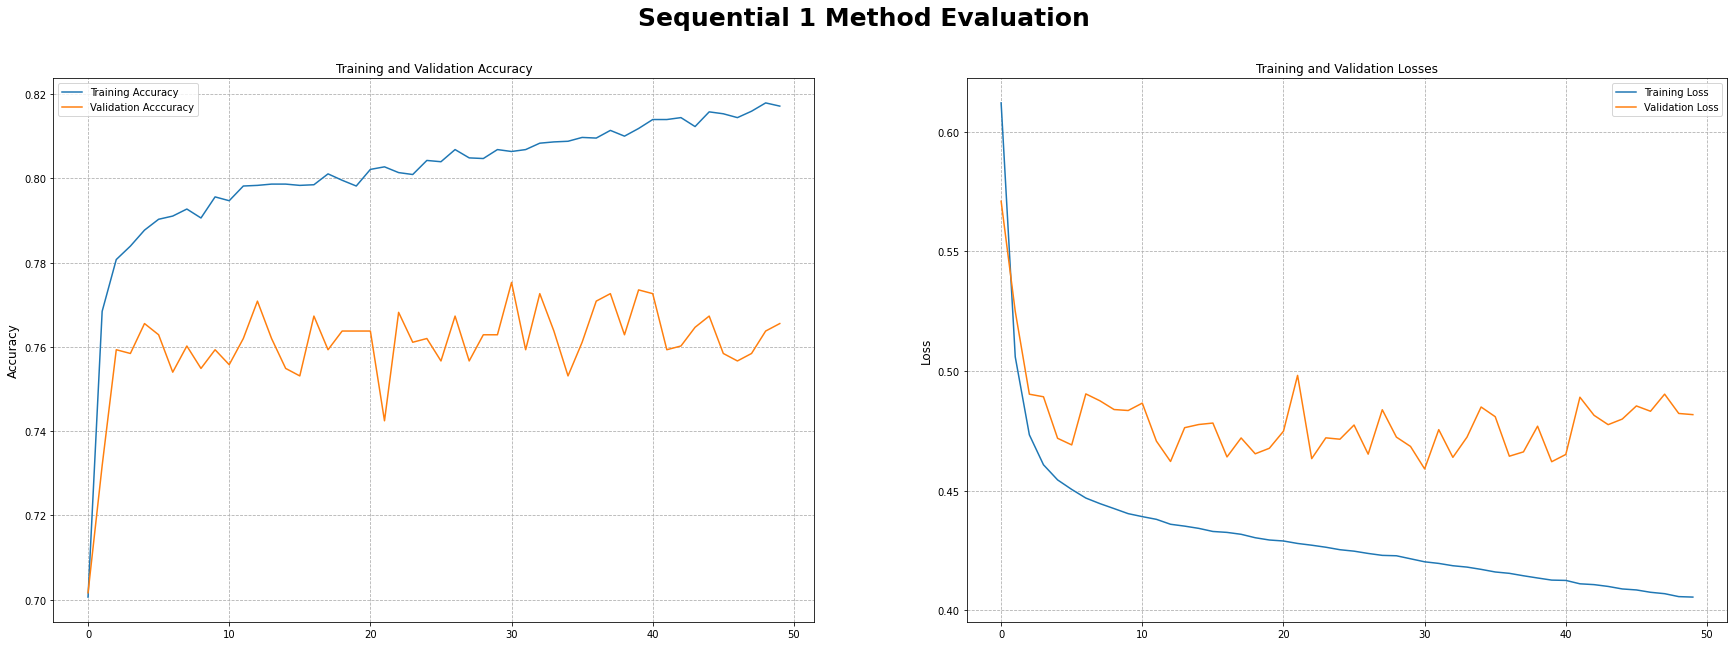

In [86]:
#Sequential
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential 1 Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_seq_1.history['accuracy'],label="Training Accuracy")
plt.plot(history_seq_1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_seq_1.history['loss'], label="Training Loss")
plt.plot(history_seq_1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

In [87]:
#Sequential
print("\nEvaluate on test data")
result = model_seq_1.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')


Evaluate on test data
44/44 [==============================] - 0s 1ms/step - loss: 0.5052 - accuracy: 0.7543
Test - Loss     :  0.5051707625389099
Test - Accuracy :  0.7542613744735718



> Berdasarkan hasil grafik baik grafik accuracy maupun loss pada model ANN Sequential diatas, diketahui bahwa model overfitting dikarnakan line chart training dan line chart validasi memiliki jarak yang agak jauh dan memiliki nilai accuracy rata - rata diatas 0.74 pada data validasi

> Dan pada model ANN Sequential memiliki los dan accuracy pada data testing masing - masing sebesar 0.50 dan 0.75

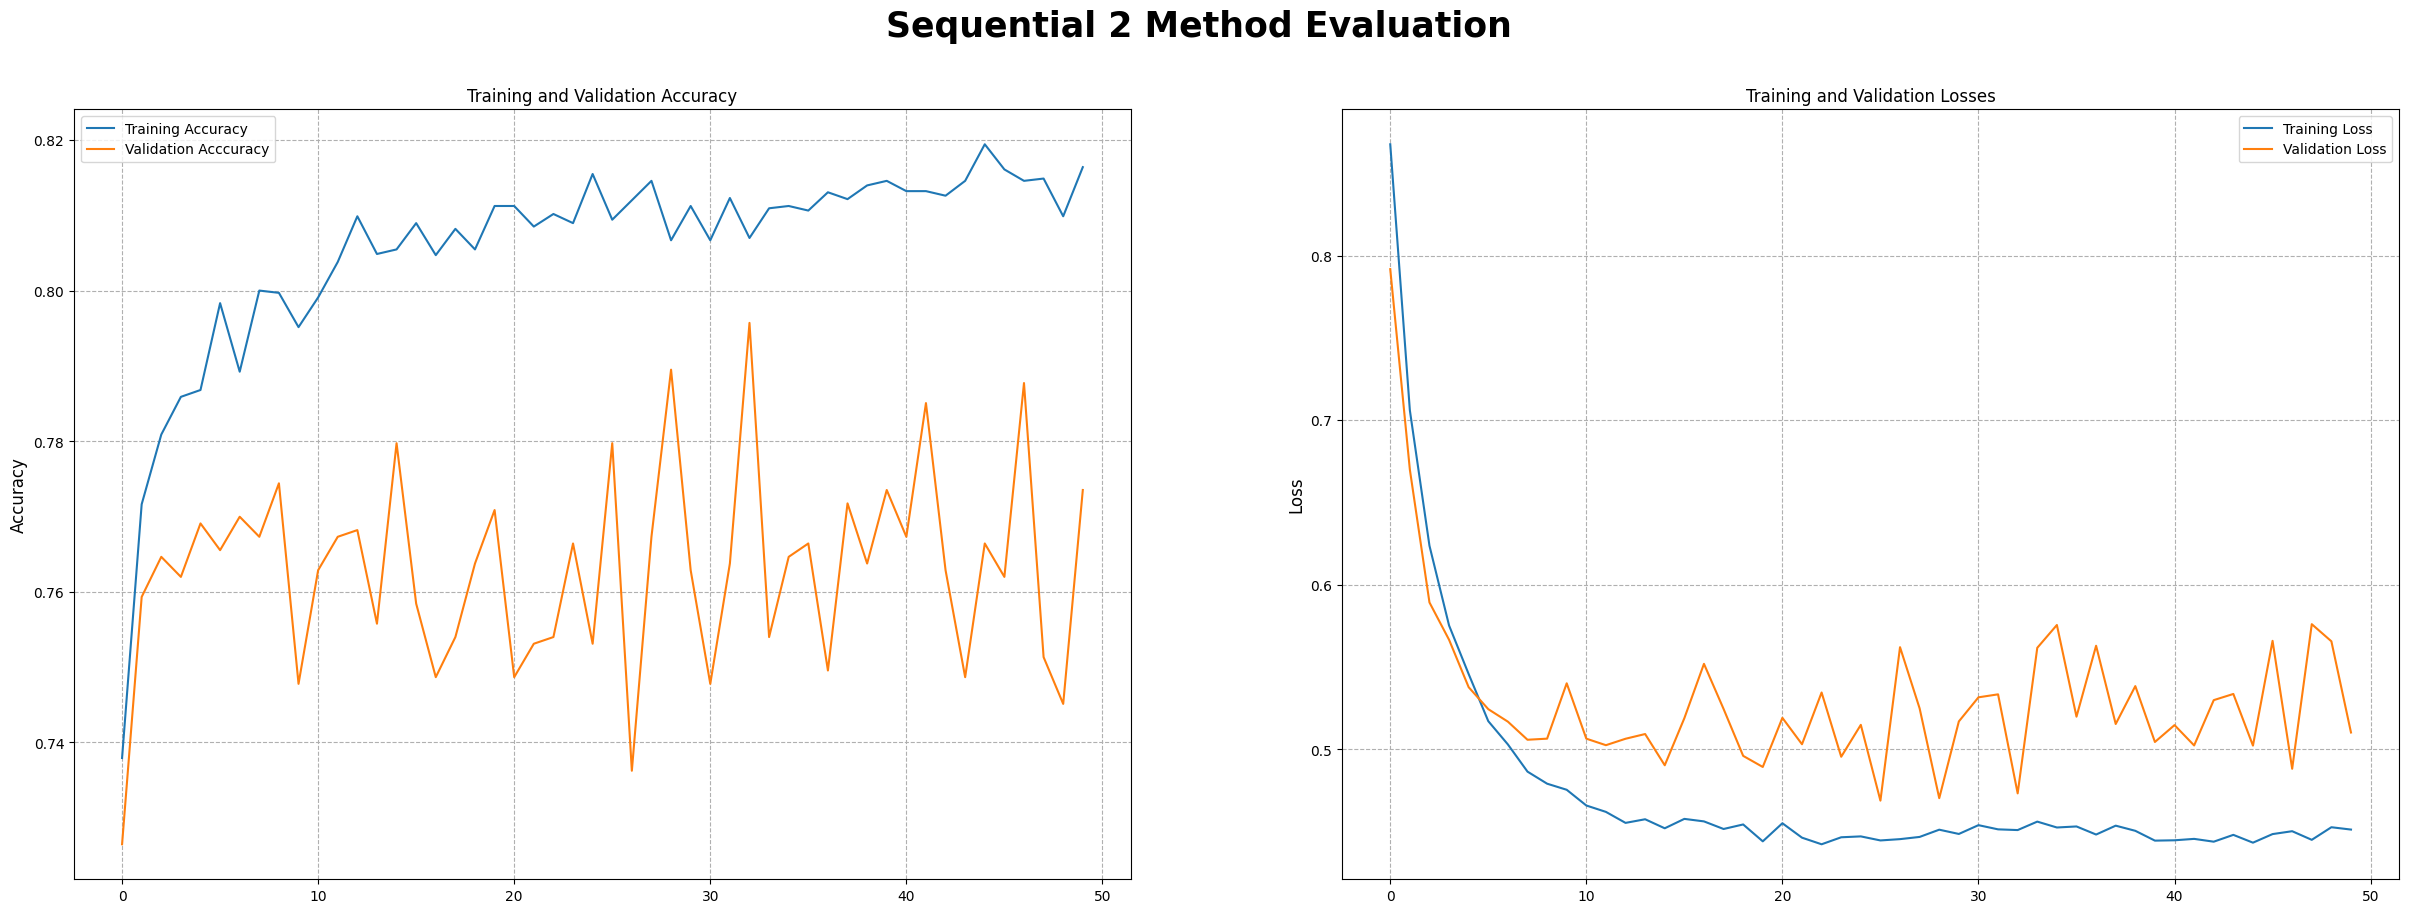

In [88]:
#Sequential Model Improvement
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Sequential 2 Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_seq_2.history['accuracy'],label="Training Accuracy")
plt.plot(history_seq_2.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_seq_2.history['loss'], label="Training Loss")
plt.plot(history_seq_2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

In [89]:
#Sequential Model Improvement
print("\nEvaluate on test data")
result = model_seq_2.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')


Evaluate on test data
44/44 [==============================] - 0s 2ms/step - loss: 0.5314 - accuracy: 0.7585
Test - Loss     :  0.5313994884490967
Test - Accuracy :  0.7585227489471436



> Berdasarkan hasil grafik baik grafik accuracy maupun loss pada ANN Sequential Model Improvement diatas, diketahui bahwa model overfitting dikarnakan line chart training dan line chart validasi memiliki jarak yang agak jauh dan memiliki nilai accuracy rata - rata diatas 0.73 pada data validasi

> Dan pada ANN Sequential Model Improvement memiliki los dan accuracy pada data testing masing - masing sebesar 0.53 dan 0.75 yang berarti tidak berdeda jauh dengan hasil model ANN Sequential 

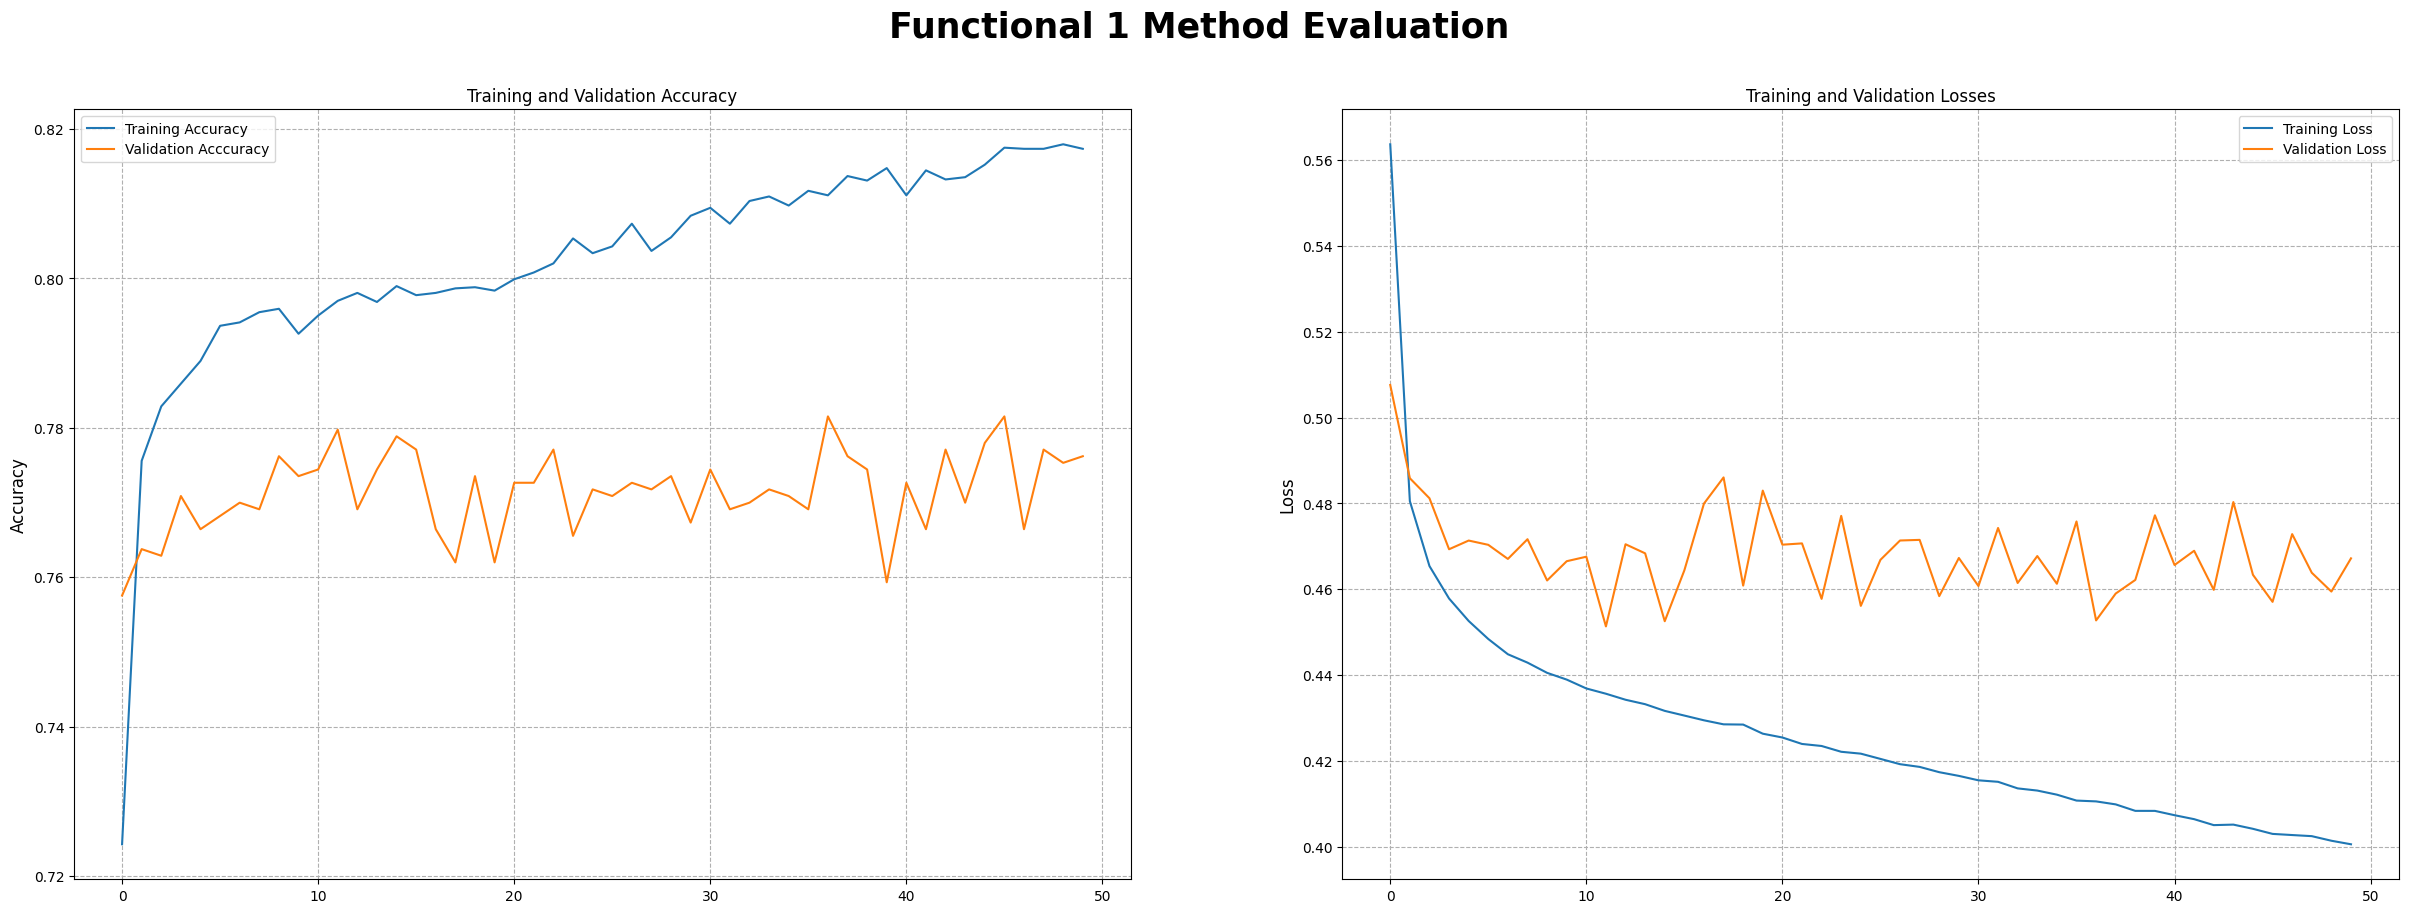

In [90]:
#Functional
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional 1 Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_func_1.history['accuracy'],label="Training Accuracy")
plt.plot(history_func_1.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_func_1.history['loss'], label="Training Loss")
plt.plot(history_func_1.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

In [91]:
#Functional
print("\nEvaluate on test data")
result = model_func_1.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')


Evaluate on test data
44/44 [==============================] - 0s 1ms/step - loss: 0.5001 - accuracy: 0.7536
Test - Loss     :  0.5001204013824463
Test - Accuracy :  0.7535511255264282



> Berdasarkan hasil grafik baik grafik accuracy maupun loss pada model ANN Functional diatas, diketahui bahwa model overfitting dikarnakan line chart training dan line chart validasi memiliki jarak yang agak jauh dan memiliki nilai accuracy rata - rata diatas 0.76 pada data validasi

> Dan pada model ANN Functional memiliki los dan accuracy pada data testing masing - masing sebesar 0.50 dan 0.75

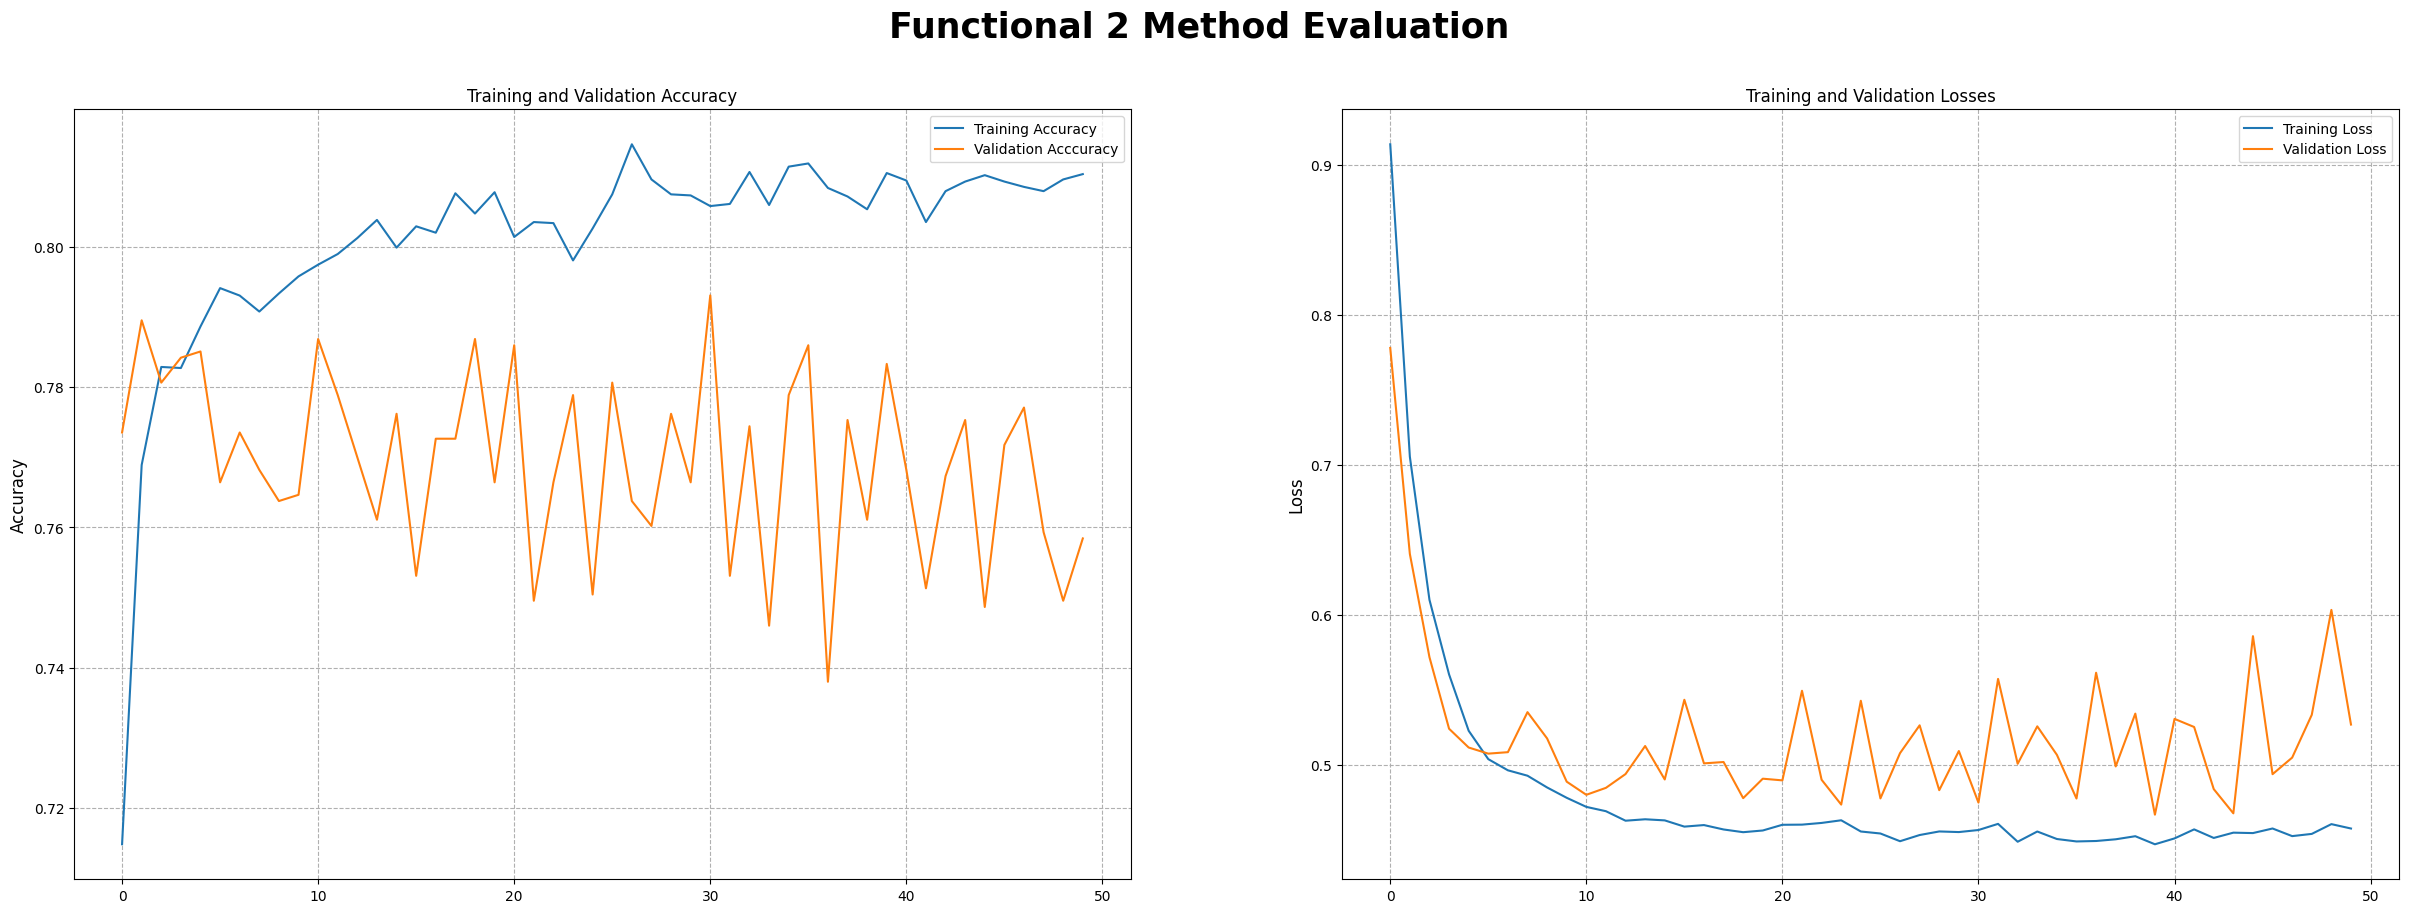

In [92]:
#Functional Model Improvement
fig, ax = plt.subplots(1,2, figsize=(30,10))
fig.suptitle('Functional 2 Method Evaluation', fontsize=25, weight='bold')

plt.subplot(1,2,1)
plt.title("Training and Validation Accuracy", fontsize=12)
plt.plot(history_func_2.history['accuracy'],label="Training Accuracy")
plt.plot(history_func_2.history['val_accuracy'], label="Validation Acccuracy")
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.subplot(1,2,2)
plt.title("Training and Validation Losses", fontsize=12)
plt.plot(history_func_2.history['loss'], label="Training Loss")
plt.plot(history_func_2.history['val_loss'], label="Validation Loss")
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.grid(linestyle='--')

plt.style.use('default')
plt.show()

In [112]:
#Functional Model Improvement
print("\nEvaluate on test data")
result = model_func_2.evaluate(test_dataset)
print('Test - Loss     : ', result[0])
print('Test - Accuracy : ', result[1])
print('')


Evaluate on test data
44/44 [==============================] - 0s 6ms/step - loss: 0.5522 - accuracy: 0.7536
Test - Loss     :  0.5521846413612366
Test - Accuracy :  0.7535511255264282



> Berdasarkan hasil grafik baik grafik accuracy maupun loss pada ANN Functional Model Improvement diatas, diketahui bahwa model overfitting dikarnakan line chart training dan line chart validasi memiliki jarak yang agak jauh dan memiliki nilai accuracy rata - rata diatas 0.74 pada data validasi

> Dan pada ANN Functional Model Improvement memiliki los dan accuracy pada data testing masing - masing sebesar 0.55 dan 0.75 yang berarti tidak berdeda jauh dengan hasil model ANN Functional 

> Berdasarkan informasi diatas, model ANN Functional ditetapkan sebagai model terbaik yang akan digunakan ke tahpan selanjutnya dibandingkan dengan model lainnya, dikarnakan jika dilihat dari hasil loss dan accuracy pada data testing dari keempat model sama - sama memiliki nilai yang sama dan tidak berbeda jauh, akan tetapi pada model ANN Functional memiliki nilai accuracy pada data validasi lebih tinggi dari pada model yang lainnya

44/44 [==============================] - 0s 1ms/step
[[806 228]
 [119 255]]


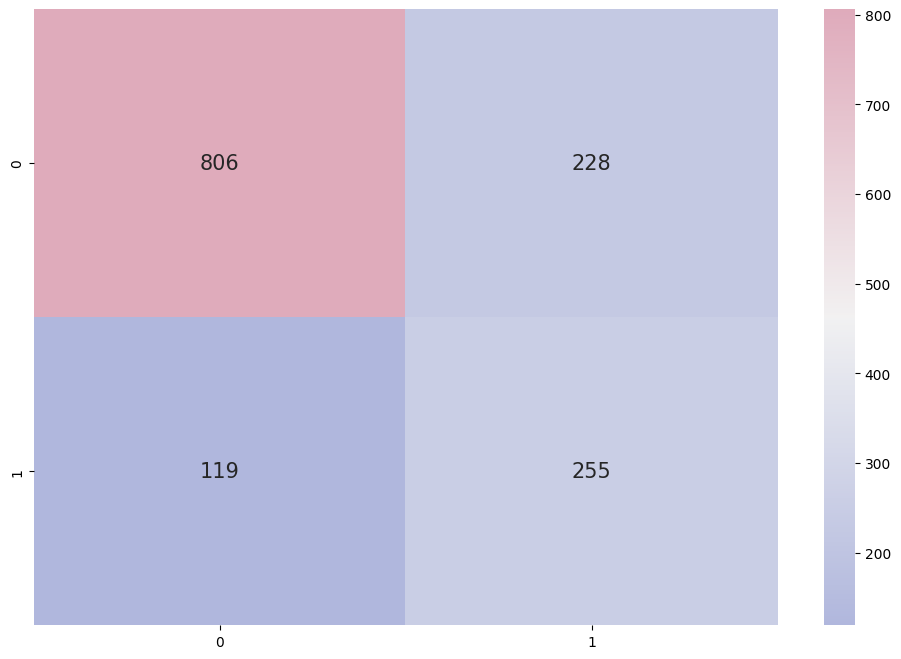

In [114]:
y_pred = model_func_1.predict(X_test)

cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred.round())
print(cf_matrix)

sns.heatmap(cf_matrix, cmap = cmap1, annot = True, annot_kws = {'size':15}, fmt='g');

In [115]:
print(f'model accuracy score: {accuracy_score(y_test, y_pred.round())}')

model accuracy score: 0.7535511363636364


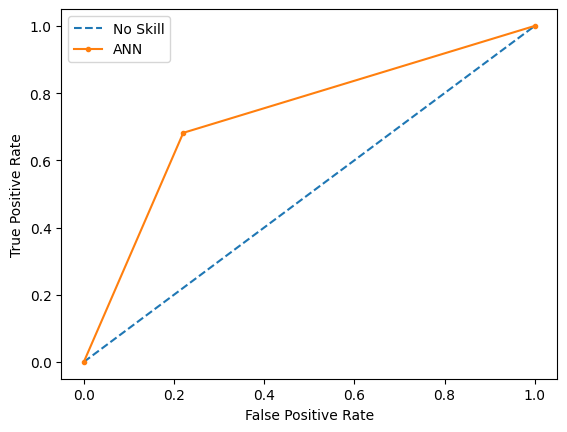

AUC score: 0.7306576402321082


In [116]:
# calculate roc curves & auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred.round())
auc = roc_auc_score(y_test,y_pred.round())

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ANN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()
print(f'AUC score: {auc}')

> Skor AUC sekitar mendekati 0,75 berarti model dapat membedakan dua kelas sebesar 75% dan kurva akan terlihat seperti cenderung mendekati garis dengan kemiringan 1.

> Jika Skor AUC mendekati 1 berarti model memiliki kemampuan untuk memisahkan dua kelas dan kurva yang lebih dekat ke sudut kiri atas grafik.

In [117]:
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1034
           1       0.53      0.68      0.60       374

    accuracy                           0.75      1408
   macro avg       0.70      0.73      0.71      1408
weighted avg       0.78      0.75      0.76      1408



> Pada pemodelan ini akan difokuskan pada nilai recall di classification_report pada dataset, dikarnakan pada kasus data ini ingin difokuskan mengurangi kesalahan negatif yang mana label 1 pada kolom Target yang berarti customer churn didefinisikan sebagai kelas positif. Sehingga dengan menggunakan scoring recall, kita menghindari kesalahan prediksi pada label 1, atau dengan kata lain mengurangi kesalahan negatif.

> Hal itu dikarnakan, tidak ingin terjadinya kesalahan prediksi yang seharusnya customer churn malah diprediksi customer tidak churn, hal ini dapat merugikan suatu perusahaan dalam mengambil suatu keputusan dalam menentukan kebijakan

memiliki nilai recall pada data testing yaitu sebesar 68% yang berarti kesalahan negatifnya masih dikatakan terlalu besar, Dan berdasarkan confusion_matrix model bisa memprediksi benar positif pada kelas 1 yaitu sebanyak 225 data dari 344 data sedangkan memprediksi salah negatif sebanyak 119 data dari 344 data. Sehingga dapat disimpulkan model kurang bagus> Dan pada model ANN Functional berdasarkan classification_report 

## **8. Model Saving**

In [118]:
import pickle

In [119]:
with open ("pipeline.pkl", "wb") as f :
    pickle.dump(unbalance_pipeline, f)

In [120]:
model_func_1.save('model.h5')

In [121]:
import sklearn
print(tf.__version__)
print(sklearn.__version__)
print(np.__version__)

2.9.2
1.0.2
1.21.6


> Proses diatas merupakan saving Model terbaik yang akan digunakan kembali dalam melakukan model inference dan model deployment 

## **9. Model Inference**

In [122]:
df_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,predict
0,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.650,20.650,0,0
1,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.600,330.250,0,0
2,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.800,19.800,0,0
3,Male,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.250,24.250,1,1
4,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.400,74.400,1,1


In [123]:
data_inf_final= df_inf.drop('Churn', axis=1)

In [124]:
with open('pipeline.pkl', 'rb') as f:
    pipe_branch = pickle.load(f)

In [125]:
data_inf_final = pd.DataFrame(pipe_branch.transform(df_inf))
data_inf_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,-1.275,-1.465,-0.994,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
1,-0.664,-1.466,-0.858,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000
2,-1.275,-1.493,-0.994,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
3,-1.275,-1.346,-0.992,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000
4,-1.275,0.309,-0.970,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,1.000


In [126]:
# load model
load_model_func = load_model('model.h5')

In [127]:
res_inf = load_model_func.predict(data_inf_final)
res_inf

1/1 [==============================] - 0s 50ms/step


array([[0.55860054],
       [0.09205444],
       [0.15671507],
       [0.93863094],
       [0.9394626 ]], dtype=float32)

In [128]:
res_inf = np.where(res_inf >= 0.5, 1, 0)
res_inf

array([[1],
       [0],
       [0],
       [1],
       [1]])

In [129]:
df_inf['predict']=res_inf

In [130]:
df_inf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,predict
0,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check,20.650,20.650,0,1
1,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.600,330.250,0,0
2,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),19.800,19.800,0,0
3,Male,0,No,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.250,24.250,1,1
4,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,74.400,74.400,1,1


> Pada tahapan model inference, model yang saya gunakan pada tahapan ini adalah model ANN Functional dan ketika dimasukan data baru model dapat berjalan dan melakukan prediksi yang berarti model dapat digunakan dan dapat berjalan dalam melakukan prediksi terhadap data baru

## **10. Conclusions** 

Dari overall analysis dapat disimpulkan bahwa:

1. Pada project ini dilakukan pembuatan beberapa model Artificial Neural Network untuk memprediksi customer churn dari dataset Telco Customer Churn yang terdiri dari 7034 entri data dan 21 kolom

2. Pada tahap Exploratory Data Analysis (EDA) - Modeling dilakukan perlakuan sebagai berikut:

>**Numerical Feature:**
>- Handling missing value dengan imputasi nilai median
>- Feature Selection dan diperoleh semua kolom feature pada dataset terpilih kecuali kolom `gender` dan kolom `PhoneService`
>- Feature Scaling pada kolom numerik dengan menggunkana Standar Scaler

>**Categorical Feature:**
>- One Hot Encoding terhadap kolom `MultipleLines` , `InternetService`,`OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Contract` dan `PaymentMethod` 
>- Ordinal Encodeng terhadap kolom `gender`, `SeniorCitizen`, `Partner`, `Dependents`, `PhoneService`, `PaperlessBilling` dan `Churn` 

3. Dilakukan pembuatan pipeline sklearn dan pipeline tensorflow pada proses preprocessing dan modeling

4. Pada Model definition terdapat beberapa model yang digunakan yaitu model:
> - ANN Sequential
> - ANN Sequential Model Improvement
> - ANN Functional
> - ANN Functional Model Improvement

5. Dari model - model ini akan dilihat performa berdasarkan acurracy disetiap model sehingga diperoleh satu model yang nantinya akan digunakan pada tahap selanjutnya

6. Dan berdasarkan analisis dari traning model, model ANN Functional ditetapkan sebagai model terbaik yang akan digunakan ke tahpan selanjutnya dibandingkan dengan model lainnya, dikarnakan jika dilihat dari hasil loss dan accuracy pada data testing dari keempat model sama - sama memiliki nilai yang sama dan tidak berbeda jauh, akan tetapi pada model ANN Functional memiliki nilai accuracy pada data validasi lebih tinggi dari pada model yang lainnya

7. Dan pada model ANN Functional berdasarkan classification_report memiliki nilai recall pada data testing yaitu sebesar 68% yang berarti kesalahan negatifnya masih dikatakan terlalu besar, Dan berdasarkan confusion_matrix model bisa memprediksi benar positif pada kelas 1 yaitu sebanyak 225 data dari 344 data sedangkan memprediksi salah negatif sebanyak 119 data dari 344 data. Sehingga dapat disimpulkan model kurang bagus